# Questions 8-1 and 8-2

In [20]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

# Function for calculating gibbs free energy
def G_molar(H_molar,S_molar,T):
    return H_molar - T*S_molar

Temp = np.array([75,80.09,85]) # temperature in celsius
H = 30.72e3 # J/mol
S = H/(80.09+273.15) # derived because G=0 at T_{trs}

print("Our Gibbs Free Energy Calculations yield the following: ", G_molar(H,S,Temp+273.15))

Our Gibbs Free Energy Calculations yield the following:  [ 442.65881554    0.         -427.00486921]


In [21]:
Cp_gas = 136.3 # J/mol
Cp_liq = 82.4 # J/mol
Temp = np.array([75,80.09,85])+273.15 # temperature in kelvin
T=sy.Symbol('T') 


# Calculations for our gibbs energy down below for Temp values
H_vap_0 = sy.N(sy.integrate(Cp_gas-Cp_liq,(T,Temp[1],Temp[0])))
H_vap_1 = sy.N(sy.integrate(Cp_gas-Cp_liq,(T,Temp[1],Temp[1])))
H_vap_2 = sy.N(sy.integrate(Cp_gas-Cp_liq,(T,Temp[1],Temp[2])))

S_vap_0 = sy.N(sy.integrate(Cp_gas/T-Cp_liq/T,(T,Temp[1],Temp[0])))
S_vap_1 = sy.N(sy.integrate(Cp_gas/T-Cp_liq/T,(T,Temp[1],Temp[1])))
S_vap_2 = sy.N(sy.integrate(Cp_gas/T-Cp_liq/T,(T,Temp[1],Temp[2])))

print("Gibbs Free Energy at Temp = 75 Celcius: ", H_vap_0+30.72e3-Temp[0]*(S_vap_0+30.72e3/Temp[1]))
print("Gibbs Free Energy at Temp = 80.09 Celcius: ",H_vap_1+30.72e3-Temp[1]*(S_vap_1+30.72e3/Temp[1]))
print("Gibbs Free Energy at Temp = 85.0 Celcius: ",H_vap_2+30.72e3-Temp[2]*(S_vap_2+30.72e3/Temp[1]))

Gibbs Free Energy at Temp = 75 Celcius:  440.672626703214
Gibbs Free Energy at Temp = 80.09 Celcius:  0
Gibbs Free Energy at Temp = 85.0 Celcius:  -428.835702999269


Here are the three heat capacity functions needed to generate functions for plotting a $G$ vs $T$ plot, just like the qualitative ones that you saw a lot of in Chem 112. (But this one is for realsies!!)  These functions are for benzene. 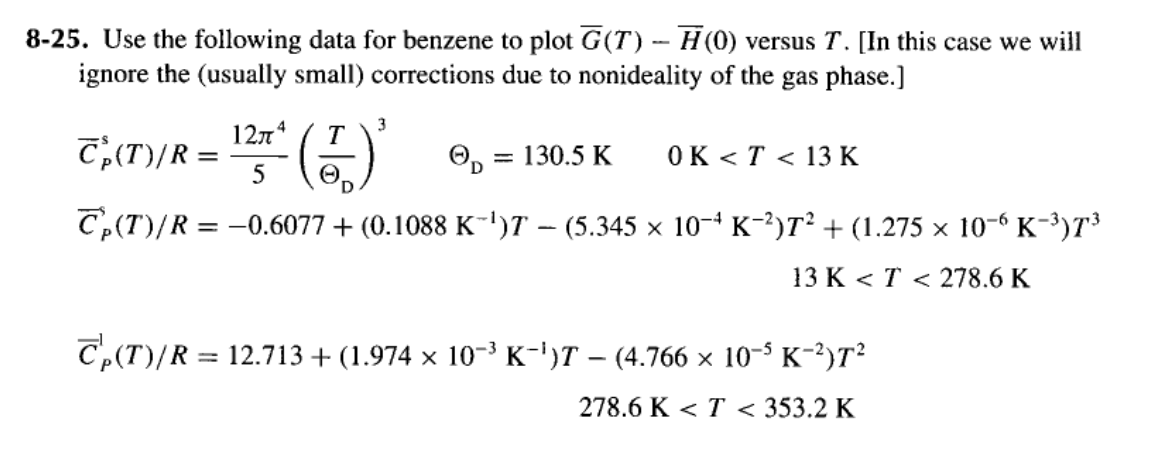

In [22]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

In [23]:
T=sy.Symbol('T')
def Cplow(T): #Cp for 0 to 13 K, the "Debye T^3" part
 return (12/5)*sy.pi**4 * (T/130.5)**3

def Cpsol(T): #Cp for solid, 13 to 278.6 K
 return -.6077 + .1088*T - 5.345e-4*T**2 + 1.275e-6*T**3

def Cpliq(T): #Cp for liquid, 278.6 K to 353.2 K
 return 12.713 + 1.974e-3*T - 4.766e-5*T**2

def Cpgas(T): #Cp for gas, 353.2 K to 1000 K
 return -4.077 + 0.05676*T-3.588e-5*T**2+8.520e-9*T**3

Now we need to start setting up what we will plot for each of the legs of the $G$ vs $T$ curve, which are all based on $G = H - TS$ where $H$ and $S$ are determined from different integrals over the heat capacity, and where the differences in $H$ and $TS$ cancel out at the phase boundaries.  $H$ comes from integrating the heat capacity straight up over a specific T range, starting from $H(T=0)$ which is why that is the "zero" point on the y axis. $S$ comes from integrating the heat capacity/$T$ over the same intervals.

Here is the setup for the first leg (the solid, whose heat capacity follows a Debye $T^3$ type behavior).  I'm going to do this discretely so I have x and y values that I can use to make a plot.

In [24]:
solidT = np.arange(0,13,0.5) #range of temperatures to evaluate G
Gsolid=[] #initializes an empty variable T that I will populate using a for loop
for Temp in solidT: #will append to Gsolid array for each temperature in solidT array
 Gsolid.append(sy.N(sy.integrate(Cplow(T),(T,0,Temp))-Temp*sy.integrate(Cplow(T)/T,(T,0,Temp))))

now let's make a plot of this first leg to make sure that it looks right.  As T increases, the heat capacity always increases and the slope of $G$ should decrease because the slope of $G$ with respect to $T$ is $-S$ and $S$ always increases.  So this curve should start dropping as the T increases after starting at zero (since we defined it to start at zero, see above).

Text(0, 0.5, 'Gibbs Free Energy')

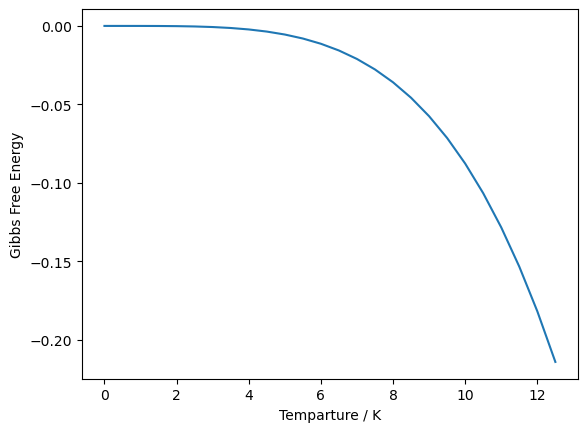

In [25]:
plt.plot(solidT, Gsolid) # plotting 0 K to 13 K
plt.xlabel("Temparture / K")
plt.ylabel("Gibbs Free Energy")

Keep in mind that the units of the y axis may need to be adjusted to make sense in real units, since the units of the heat capacity functions from above are $R$.

Now your job is to fill in similar integrals for the liquid and gas phases and make a plot with all three legs: you should see small but clear discontinuities at all of the phase transition points, but the $G$ at the phase transitions should match.  Think carefully about how to make that happen: remember that $G(T)$ is essentially a running integral of $H$ and $-TS$.

First do the liquid part, which covers a specific range of $T$ (see above):

Text(0, 0.5, 'Gibbs Free Energy')

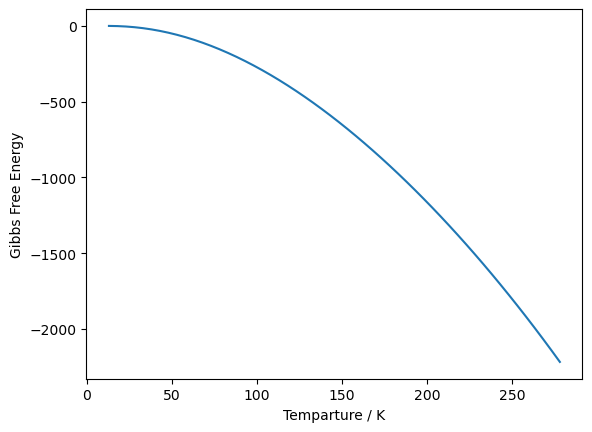

In [26]:
solidT2 = np.arange(13,278.6,5) #range of temperatures to evaluate G
Gsolid2 = [] #initializes an empty variable T that I will populate using a for loop
Cp_low_H = sy.N(sy.integrate(Cplow(T),(T,0,13)))
Cp_low_S = sy.N(sy.integrate(Cplow(T)/T,(T,0,13)))
for Temp in solidT2: #will append to Gsolid array for each temperature in solidT array
 Gsolid2.append(Cp_low_H+sy.N(sy.integrate(Cpsol(T),(T,13,Temp)))-Temp*(Cp_low_S+sy.N(sy.integrate(Cpsol(T)/T,(T,13,Temp)))))

plt.plot(solidT2, Gsolid2)
plt.xlabel("Temparture / K")
plt.ylabel("Gibbs Free Energy")

Text(0, 0.5, 'Gibbs Free Energy')

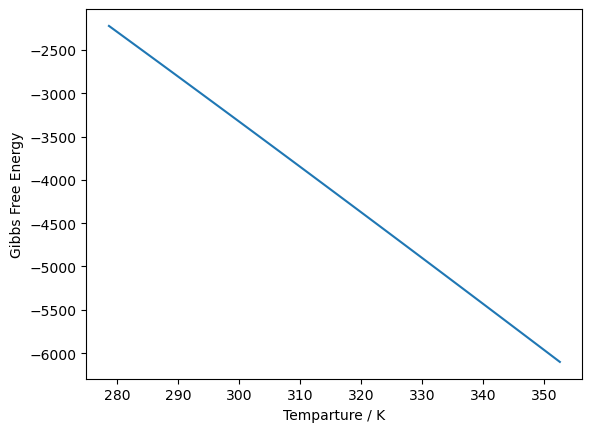

In [27]:
liquidT = np.arange(278.6,353.2,1) #range of temperatures to evaluate G
Gliquid = [] #initializes an empty variable T that I will populate using a for loop
Cp_sol_H = sy.N(sy.integrate(Cpsol(T),(T,13,278.6)))
Cp_sol_S = sy.N(sy.integrate(Cpsol(T)/T,(T,13,278.6)))
H_fus = 9.95e3 # J/K
T_fus = 278.68 # K
for Temp in liquidT: #will append to Gsolid array for each temperature in solidT array
 Gliquid.append(H_fus+Cp_low_H+Cp_sol_H+sy.N(sy.integrate(Cpliq(T),(T,278.6,Temp)))-Temp*(H_fus/T_fus+Cp_low_S+Cp_sol_S+sy.N(sy.integrate(Cpliq(T)/T,(T,278.6,Temp)))))


plt.plot(liquidT, Gliquid)
plt.xlabel("Temparture / K")
plt.ylabel("Gibbs Free Energy")

Then do the gas part (same story, look above to get the $T$ range correct):

Text(0, 0.5, 'Gibbs Free Energy')

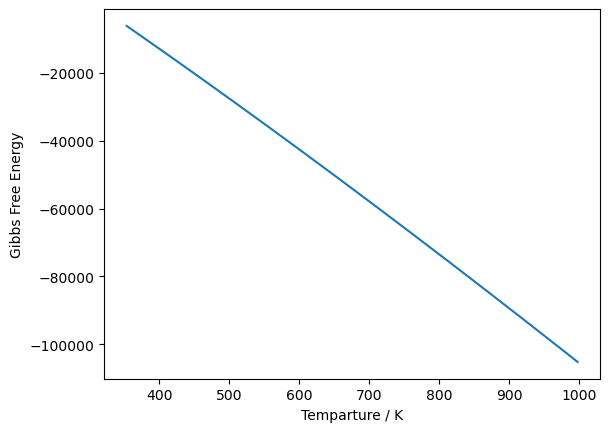

In [28]:
gasT = np.arange(353.2,1000,5) #range of temperatures to evaluate G
Ggas = [] #initializes an empty variable T that I will populate using a for loop
Cp_liq_H = sy.N(sy.integrate(Cpsol(T),(T,278.6,353.2)))
Cp_liq_S = sy.N(sy.integrate(Cpsol(T)/T,(T,278.6,353.2)))
H_vap = 30.72e3 # J/K
T_vap = 353.24 # K
for Temp in gasT: #will append to Gsolid array for each temperature in solidT array
 Ggas.append(H_vap+H_fus+Cp_low_H+Cp_sol_H+Cp_liq_H+sy.N(sy.integrate(Cpgas(T),(T,353.2,Temp)))-Temp*(H_vap/T_vap+H_fus/T_fus+Cp_low_S+Cp_sol_S+Cp_liq_S+sy.N(sy.integrate(Cpgas(T)/T,(T,353.2,Temp)))))
 # print(first_part+sy.N(sy.integrate(Cpsol(T),(T,13,Temp)))-Temp*(second_part+sy.N(sy.integrate(Cpsol(T)/T,(T,13,Temp)))))

plt.plot(gasT, Ggas)
plt.xlabel("Temparture / K")
plt.ylabel("Gibbs Free Energy")

Then make a plot of all three of your functions at the same time and make sure that they line up with each other the way you would expect in a $G$ vs $T$ plot.

Text(0, 0.5, 'Gibbs Free Energy')

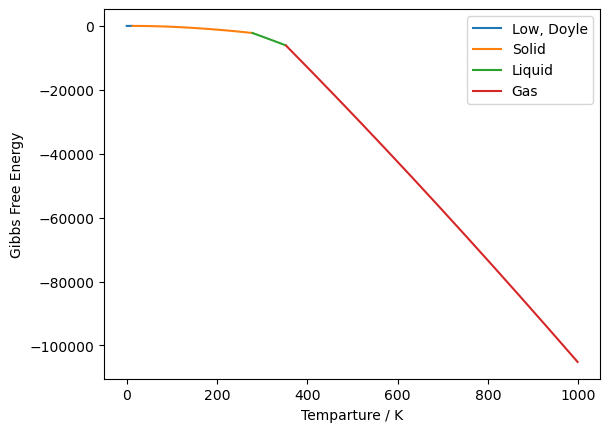

In [29]:
plt.plot(solidT, Gsolid, label="Low, Doyle")
plt.plot(solidT2, Gsolid2, label="Solid")
plt.plot(liquidT, Gliquid, label="Liquid")
plt.plot(gasT, Ggas, label="Gas")
plt.legend()
plt.xlabel("Temparture / K")
plt.ylabel("Gibbs Free Energy")